參考資料：
1. AE in keras: https://blog.keras.io/building-autoencoders-in-keras.html
- Autoencoder 自编码:https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/
- https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras import backend as K

E:\Anaconda3\envs\TF-Ke\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
batch_size = 128
# num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
dataSetName = "mnist-pria-awgn_snr=10.npz"
f = np.load(dataSetName)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') /255 -0.5
x_test = x_test.astype('float32') /255 -0.5
x_train *= 2
x_test *= 2

In [7]:
print(x_train.shape[0], 'train samples', "in", x_train.shape)
print(x_test.shape[0], 'test samples', x_test.shape)

60000 train samples in (60000, 784)
10000 test samples (10000, 784)


In [8]:
## 法 2
input_img = Input(shape=(784,))
# encoder layers
encoded = Dense(1500, activation='relu')(input_img)
encoded = Dense(375, activation='relu')(encoded)
encoder_output = Dense(50)(encoded)
# decoder layers
decoded = Dense(375, activation='relu')(encoder_output)
decoded = Dense(1500, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

E:\Anaconda3\envs\TF-Ke\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [9]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 375)               562875    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                18800     
_________________________________________________________________
dense_4 (Dense)              (None, 375)               19125     
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              564000    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1176784   
Total para

In [10]:
# model.compile(loss='MSE',
#               optimizer=adam(),
#               metrics=['accuracy'])
autoencoder.compile(optimizer='adam', loss='mse')

In [11]:
history = autoencoder.fit(x_train, x_train, # 適應、訓練，
                    batch_size=batch_size, #
                    epochs=epochs)

Epoch 1/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.0876
Epoch 2/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0464: 0s - loss: 0.0
Epoch 3/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0404
Epoch 4/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0373
Epoch 5/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0355
Epoch 6/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0342
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0332
Epoch 8/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0324
Epoch 9/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0318
Epoch 10/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0312
Epoch 11/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0308
Epoch 12/50
60000/60000 [==========

In [12]:
model_name = "model_2_e"+str(epochs)+"_b"+str(batch_size)+".h5"
autoencoder.save(model_name)

In [13]:
decodeImg = autoencoder.predict(x_test)

In [14]:
decodeImg = ((decodeImg /2)+0.5) * 255

In [15]:
decodeImg = np.reshape(decodeImg, (decodeImg.shape[0], 28, 28))

In [16]:
img0 = decodeImg[0]
for i in range(1, 20):
    img1 = decodeImg[i]
    img0 = np.hstack((img0, img1))

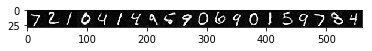

In [17]:
plt.imshow(img0, cmap = "gray")
plt.savefig(model_name.split(".")[0] + ".png")
plt.show()